## An example of custom remote SHC model evaluation

In [1]:
# load data from VirES server
from eoxmagmod.data import CHAOS6_CORE_LATEST as CUSTOM_SHC_FILE
from viresclient import SwarmRequest

request = SwarmRequest("https://staging.viresdisc.vires.services/openows")
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=['B_NEC'],
    auxiliaries=['QDLat'],
    sampling_step="PT1S",
    custom_model=CUSTOM_SHC_FILE,
)
data = request.get_between(
    start_time="2014-01-01T00:00:00Z",
    end_time="2014-01-02T00:00:00Z"
).as_xarray()

/usr/local/conda/lib/python3.7/site-packages/spacepy/pycdf/__init__.py:1209: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class CDF(collections.MutableMapping):
[1/1] Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ]

Can't download new leap second table
Can't find leap second table.  Using one built into code.
Last leap second in built in table is on Jan 01 2017. 


[1/1] Processing:  100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (7.695MB)


In [2]:
# extract times, coordinates and other data

from numpy import asarray, datetime64, stack

NS2DAYS = 1.0/(24*60*60*1e9) # nano seconds to days scale factor

# time as MJD2000
times = (
    asarray(data["Timestamp"], dtype="M8[ns]") - datetime64('2000')
).astype('int64') * NS2DAYS

# spherical coordinates
coords = stack((
    data["Latitude"].values, # latitude in deg
    data["Longitude"].values, # latitude in deg
    data["Radius"].values*1e-3, # radius in km
), axis=1)

# measurements
b_nec_measured = data["B_NEC"].values

# model values
b_nec_model = data["B_NEC_Custom_Model"]

# quasi-dipole latitudes
qdlats = data["QDLat"].values

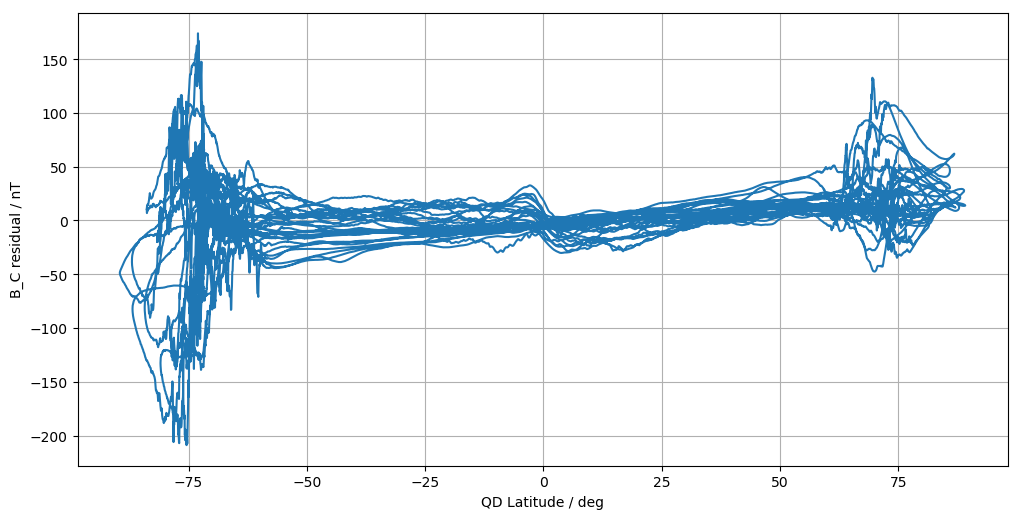

In [4]:
# display residuals

from matplotlib.pyplot import figure, subplot, show

b_nec_res = b_nec_measured - b_nec_model

fig = figure(figsize=(12, 6), dpi=100)
ax = subplot(111)
ax.plot(qdlats, b_nec_res[..., 2])
ax.grid()
ax.set_xlabel('QD Latitude / deg')
ax.set_ylabel('B_C residual / nT')

show()